In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [18]:
!pip install tensorflow==2.5.0

     |████████████████████████████████| 454.3 MB 18 kB/s 
     |████████████████████████████████| 4.0 MB 57.3 MB/s 
     |████████████████████████████████| 1.2 MB 56.8 MB/s 
     |████████████████████████████████| 462 kB 75.7 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.39.0
    Uninstalling grpcio-1.39.0:
      Successfully uninstalled grpcio-1.39.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [4]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 88.4MB/s]


In [5]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))# Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences = True)))# An LSTM Layer)
model.add(Dropout(0.2))# A dropout layer)
model.add(LSTM(100))# Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))# A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# Pick a loss function and an optimizer)
### END CODE HERE

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [6]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 14s 8ms/step - loss: 6.9083 - accuracy: 0.0206
Epoch 2/100
484/484 [==============================] - 4s 8ms/step - loss: 6.5025 - accuracy: 0.0221
Epoch 3/100
484/484 [==============================] - 4s 8ms/step - loss: 6.3949 - accuracy: 0.0252
Epoch 4/100
484/484 [==============================] - 4s 8ms/step - loss: 6.2721 - accuracy: 0.0325
Epoch 5/100
484/484 [==============================] - 4s 8ms/step - loss: 6.1800 - accuracy: 0.0349
Epoch 6/100
484/484 [==============================] - 4s 8ms/step - loss: 6.0957 - accuracy: 0.0395
Epoch 7/100
484/484 [==============================] - 4s 8ms/step - loss: 6.0148 - accuracy: 0.0418
Epoch 8/100
484/484 [==============================] - 4s 8ms/step - loss: 5.9186 - accuracy: 0.0487
Epoch 9/100
484/484 [==============================] - 4s 8ms/step - loss: 5.8176 - accuracy: 0.0543
Epoch 10/100
484/484 [==============================] - 4s 8ms/step - loss: 5.7126 - accur

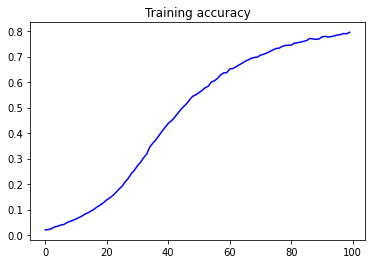

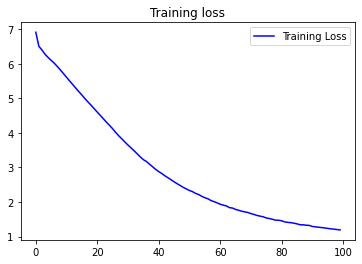

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [21]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list, verbose=0),1)

	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope or give give hell days cold much days lies writ dead rich see tell thy part right time much dead fall so doth weeds decrease quite hits tell days live o'er fall so young o'er canopy me life them young much fall let thee lie by me eyes not much hell now dumb room dearer burn'd moan truth year men still such eye's old part doth bear rolling tell thee now dead lie die now loss in thee one best room bring to hide thine in eye am but once art so possess'd with dearer gait reap clearer light light
